In [1]:
from DRP_rotation_curve import extract_data, extract_Pipe3d_data
from rotation_fitfunctions import find_phi, find_incl, find_axis_ratio
from astropy.table import Table
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt


In [2]:
#where the data lives
MANGA_FOLDER = '/scratch/kdougla7/data/SDSS/dr17/manga/spectro/'
VEL_MAP_FOLDER = MANGA_FOLDER + 'analysis/v3_1_1/3.1.0/HYB10-MILESHC-MASTARSSP/'
DRP_FILENAME = MANGA_FOLDER + 'redux/v3_1_1/' + 'drpall-v3_1_1.fits'

In [3]:
#reading in DRP_all
DRP_table = Table.read(DRP_FILENAME, 'MANGA')

DRP_index = {}

for i in range(len(DRP_table)):
    galaxy_ID = DRP_table['plateifu'][i]

    DRP_index[galaxy_ID] = i


In [464]:

full_fail = Table.read('/scratch/lstroud3/RotationCurves/failed_objects_table.fits')
t = full_fail[full_fail['fitting code']==222]




#galaxy being checked
gal_ID = t[t['visual code'] ==3]['plateifu'][0]

In [465]:
#reading in velocity map and getting center/phi
maps = extract_data(VEL_MAP_FOLDER,gal_ID,['Ha_vel', 'r_band', 'Ha_flux', 'Ha_sigma'])
SN_map = maps['Ha_flux'] * np.sqrt(maps['Ha_flux_ivar'])
vmap_mask = maps['Ha_vel_mask'] + (SN_map < 5)
maps['vmasked'] = ma.array(maps['Ha_vel'], mask=vmap_mask)
maps['ivarmasked'] = ma.array(maps['Ha_vel_ivar'], mask=vmap_mask)
maps['rbandmasked'] = ma.array(maps['r_band'], mask = maps['Ha_vel_mask'])
i_DRP = DRP_index[gal_ID]
shape = maps['vmasked'].shape



In [466]:
if gal_ID in ['10220-12703','10516-12705','10520-12705','12066-12703',\
                          '11012-12703','8239-12703','8941-12703','8717-12705',\
                          '10841-12705','11018-12701','11743-12701','11751-12702',\
                          '11824-12702','11832-12702','11865-12705','12651-12701',\
                          '8088-12704','8438-12705','8711-12701','8950-12705','9037-9102'\
                         '9498-12703',]:
    center = (37,37)
                
elif gal_ID in ['8466-12705','11021-12702']:
    center = (37,42)
                
elif gal_ID in ['10222-6102','8133-6102','8252-6103']:
    center = (27,27)

elif gal_ID == '11830-3704':
    center = (20,19)         
            
elif gal_ID in ['9879-6101','10845-6101','11758-6103','9872-6103']:
    center = (30,27)      

elif gal_ID in ['7443-3701','8335-3704','9514-3702','8318-3702','8657-3702','7815-3704','8341-3702']:
    center = (22,22)  

elif gal_ID in ['8728-6104','12488-6102','8551-6104','8570-6104']:
    center = (25,25)
elif gal_ID in ['10223-12704']:
    center = (41,31)
elif gal_ID == '11945-9101':
    center = (31,31)
            
elif gal_ID == '12066-12703':
    center = (37,30)
                         
elif gal_ID == '10495-12704':
    center = (39,36)
            
elif gal_ID in ['10515-3703','8651-3702']:
    center = (20,25)
elif gal_ID in ['11021-12702','9891-12704']:
    center = (35,40)
elif gal_ID in ['11823-12702','11947-12703']:
    center = (40,40)
elif gal_ID == '8240-12705':
    center = (45,45)
elif gal_ID in ['8613-12701','9890-12705']:
    center = (40,37)
elif gal_ID == '8626-1902':
    center = (17,17)
elif gal_ID == '9046-12705':
    center = (30,35)
else:
    center = np.unravel_index(ma.argmax(maps['rbandmasked']), shape)

phi = DRP_table['nsa_elpetro_phi'][i_DRP] 
new_phi = find_phi(center, phi, maps['vmasked'])
phi *= np.pi/180
print(phi,new_phi)
print(shape)            

4.577113746050365
1.4355210924605721 4.577113746050365
(74, 74)


(37, 37)


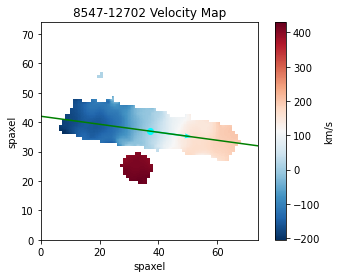

In [467]:
print(center)
plt.imshow(maps['vmasked'],origin='lower',cmap='RdBu_r')#,vmax=50)# vmin = -100)
cbar = plt.colorbar()
plt.plot(center[0],center[1],marker='o',color='cyan')
plt.quiver([center[0]],[center[1]],[-np.sin(new_phi)],[np.cos(new_phi)],scale=5,color='cyan')
y= np.linspace(0,shape[0])
plt.plot(-((np.tan(phi))*(y-center[1]))+center[0],y,color='green')
plt.xlim(0,shape[0])
plt.ylim(0,shape[1])
plt.xlabel('spaxel')
plt.ylabel('spaxel')
plt.title(gal_ID+' Velocity Map')

cbar.set_label('km/s')

#agn/continous masks

In [396]:
maps['vmasked'] -= maps['vmasked'][center]

In [468]:
full_fail['visual code'][fail_index[gal_ID]] = 3.5
full_fail.write('/scratch/lstroud3/RotationCurves/failed_objects_table.fits',overwrite='true')
#1 phi wrong, 5 find phi wrong, 4 not sure what wrong, 2 center wrong, 3 weird


#3.1 phi wrong
#3.2 center wrong
#3.3 map weird
#3.4 not sure
#3.5 some extraneous pixels need to be masked

In [430]:
print(full_fail['plateifu'][fail_index[gal_ID]])

8453-6102


In [5]:
fail_index = {}
for i in range(len(full_fail)):
    g = full_fail['plateifu'][i]
    fail_index[g] = i

In [469]:
np.unique(full_fail['visual code'],return_counts=True)

(<MaskedColumn name='visual code' dtype='float64' length=10>
 1.0
 2.0
 3.0
 3.1
 3.2
 3.3
 3.4
 3.5
 4.0
  --,
 array([ 167,    3,   61,   33,   11,   33,   12,    8,  306, 1883]))

In [111]:
t = full_fail[full_fail['fitting code']==222]
t[t['visual code']==2].show_in_notebook()

idx,plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7],Isothermal chi2,NFW chi2,Burkert chi2,fitting code,visual code
0,11978,12701,11978-12701,1-294537,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,249.823000211,20.4815891141,38.6427144244,37.885002369,249.823,20.481589,0.0637748,9,8100.79,0,18.6949,48.3751,ma057,22,1,12259,250.53024,21.613958,1.02349,1.03937,1.07842,1.32465,1.44418,1.67171,0.863491,0.875162,0.883735,58665,58665,58665,2.55851,2.55191,2.54296,2.53257,2080,0,8388608,1,plateTargets-1.par,7593,J163917.51+202853.7,127,169,0,0.061554644,0.027411299,0.039516494,0.058709648,0.06432304,0.022192728,0.04573329,0.59491783,-999.0,0.22464368,0.24687965,0.42430046,0.51127803,-999.0,0.15014528,0.15976281,279,4002,5,v1_0_1,311596,-999,0.061554644,0.061800513,-16.914621 .. -21.751368,-17.623293 .. -21.529688,8.241771 .. 850.1279,34700330000.0,25335360000.0,0.6056041,149.00507,0.52347606 .. 0.09339216,6.2610025,5.1902356,10.071947 .. 996.16156,0.02573588 .. 0.0036107393,19.409824 .. 1011.7943,0.026133105 .. 0.004167675,0.52630454,1.6762757,149.22656,7.281101,9.7569685 .. 1237.2483,0.08068133 .. 0.014796845,--,--,--,222.0,2.0
1,9037,9102,9037-9102,1-247771,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,235.910665084,43.8248209256,70.2827585957,51.7164603161,235.91067,43.824821,0.0209941,9,8100.7,0,23.6224,45.8916,ma125,33,6,9630,234.45221,43.385616,1.01969,1.05587,1.21638,1.14836,1.27256,1.87544,0.859875,0.877498,0.87926,57863,57863,57864,2.48123,2.51973,2.52549,2.5268,0,0,1024,1,plateTargets-1.par,6367,J154338.54+434929.3,91,-999,0,0.03743,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,69,3187,2,v1_0_1,262329,-999,0.0374297,0.0378507,-15.5022 .. -19.636,-15.8476 .. -19.5686,4.75763 .. 682.238,4419590000.0,3992650000.0,0.199388,117.897,0.173301 .. 0.0309182,8.71328,6.24323,14.1307 .. 415.966,0.00991748 .. 0.00239621,13.8056 .. 490.481,0.0296516 .. 0.00866102,0.15,0.653566,117.811,8.90436,9.88558 .. 520.376,0.0792868 .. 0.0365285,--,--,--,222.0,2.0
2,9498,12703,9498-12703,1-163668,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,118.151107409,24.5676237974,196.384159506,23.7692148921,118.15111,24.567624,0.0683267,15,13501.4,0,29.1409,49.6577,ma027,31,2,10047,118.53847,23.229647,1.02239,1.08425,1.15656,1.39828,1.80786,2.17769,0.92056,0.98385,1.00324,58046,58048,58049,2.75957,2.70017,2.69688,2.69457,2304,0,0,1,plateTargets-1.par,6651,J075236.26+243403.3,127,91,127,0.0500388,0.0233117,0.03039,0.0456233,0.0500093,0.0183666,0.0357024,0.65632,-999.0,0.501777,0.547152,0.83265,0.965519,-999.0,0.310819,0.327651,18,2961,3,v1_0_1,173063,-999,0.0500388,0.0499658,-15.8223 .. -20.6701,-15.8292 .. -20.6165,4.27691 .. 609.307,13235800000.0,12619700000.0,0.389244,70.9067,0.568579 .. 0.101439,4.82023,3.56821,5.08516 .. 643.587,0.138369 .. 0.00327578,5.35668 .. 671.15,0.176917 .. 0.00353077,0.25806,1.39921,71.1199,5.36452,5.36513 .. 707.416,0.476022 .. 0.0255824,--,--,--,222.0,2.0


In [429]:
full_fail = Table.read('/scratch/lstroud3/RotationCurves/failed_objects_table.fits')
t = full_fail[full_fail['fitting code']==222]
l = t[t['visual code'] ==3]
l['plateifu','visual code'].show_in_notebook()

idx,plateifu,visual code
0,8453-6102,3.0
1,8458-3701,3.0
2,8461-1902,3.0
3,8465-3702,3.0
4,8466-1901,3.0
5,8483-3704,3.0
6,8486-6104,3.0
7,8547-12702,3.0
8,8549-1901,3.0
9,8551-1902,3.0


In [ ]:
#11014-9101 was missorted as find phi instead of phi
#11978-12701, 9037-9102,9498-12703, didn't actually get center corrected
#7972-6102